In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks_cwt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [69]:
data = pd.read_csv('../data/ExoTrain.csv')
data = data.as_matrix()
X = data[:, 1:]
Y = data[:, 0]-1

In [70]:
yes_idx = [idx for idx, i in enumerate(Y) if i == 1]
no_idx =  [idx for idx, i in enumerate(Y) if i == 0]

# Utility Functions

In [75]:
def find_peaks(smooth):
    peaks = find_peaks_cwt(-smooth, np.arange(1, 100))
    return peaks

def plot_peaks(smooth, peaks):
    plt.figure(figsize=(15, 5))
    plt.plot(smooth, label='Smoothened flux data')
    plt.scatter(peaks, smooth[peaks], marker='o', s=50, c='g', label='Minima')
    plt.legend(loc='upper right', fancybox=True, shadow=True)
    plt.title('Locating peaks')
    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.show()

def smoothen(data):
    return savgol_filter(data, polyorder=5, window_length=35)

def peak_features(data):
    smooth = smoothen(data)
    peaks = find_peaks(smooth)
    features = np.empty(18)

    std1  = np.std(smooth)
    mean  = np.mean(smooth)
    std2  = 2*std1
    std3  = 3*std1
    min1  = np.where(smooth < (mean-std1))
    min2  = np.where(smooth < (mean-std2))
    min3  = np.where(smooth < (mean-std3))
    min01 = np.where(np.logical_and(smooth > (mean-std1), smooth < mean))
    min12 = np.where(np.logical_and(smooth < (mean-std1), smooth > (mean-std2)))
    min23 = np.where(np.logical_and(smooth < (mean-std2), smooth > (mean-std3)))
    
    # Compute the features
    features[0], features[1], features[2] = len(min1), len(min2), len(min3)
    features[3], features[4], features[5] = len(min01), len(min12), len(min23)
    
    # Distance between peaks along time
    def dist_time(data):
        dist = data - np.roll(data, shift=-1)
        return np.mean(dist), np.std(dist)
    
    features[6], features[7]   = dist_time(min1)
    features[8], features[9]   = dist_time(min2)
    features[10], features[11] = dist_time(min3)

    features[12], features[13] = dist_time(min1)
    features[14], features[15] = dist_time(min2)
    features[16], features[17] = dist_time(min3)
    
    return features
    
def visualize(data, label):
    plt.figure(figsize=(15, 5))
    plt.plot(data, label=label)
    plt.legend(loc='upper right', fancybox=True, shadow=True)
    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.show()

# Finding peaks and plotting them

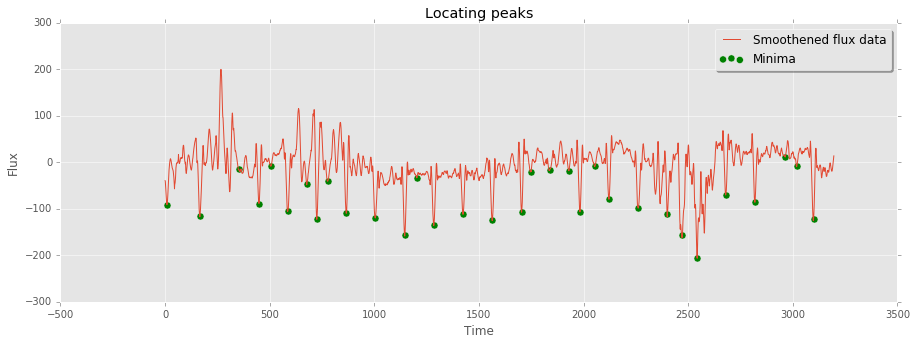

In [76]:
sav_gol_smoothed = smoothen(X[0])
peaks = find_peaks(sav_gol_smoothed)
plot_peaks(sav_gol_smoothed, peaks)

# Visualize Extreme Plots

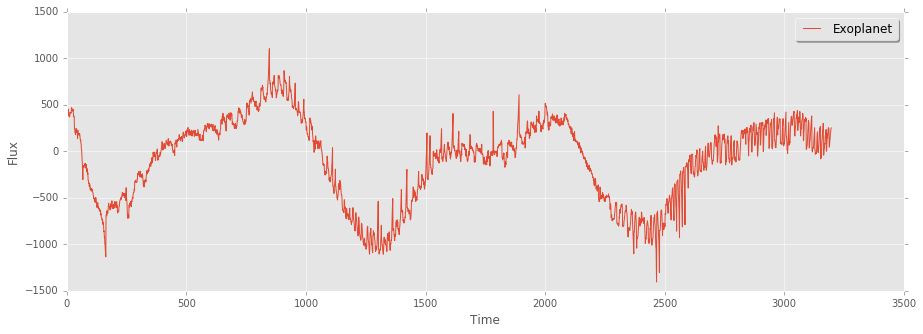

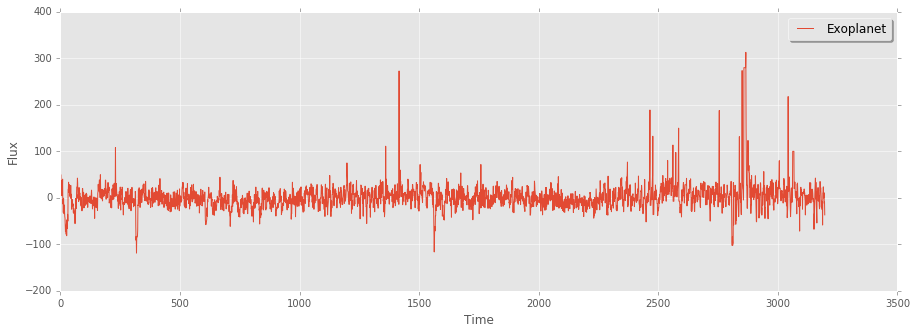

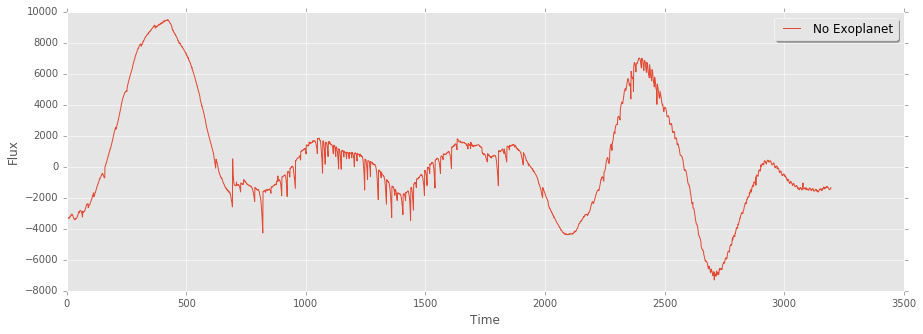

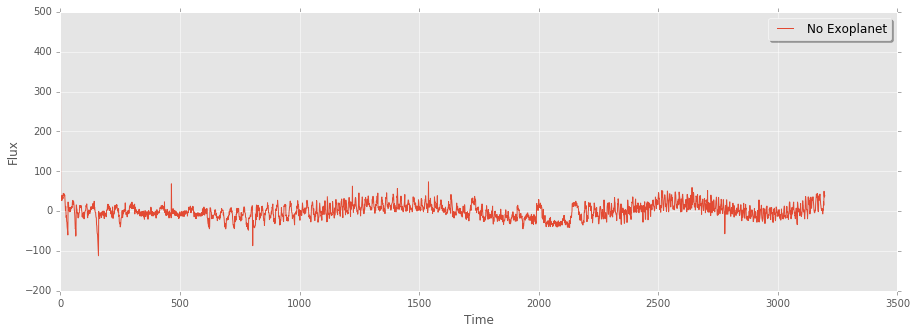

In [77]:
visualize(X[yes_idx[12]], 'Exoplanet')    # True Positive
visualize(X[yes_idx[5]], 'Exoplanet')     # False Positive
visualize(X[no_idx[5]], 'No Exoplanet')   # True Negative
visualize(X[no_idx[164]], 'No Exoplanet') # False Negative